#### About
> Generative Adversarial Networks
1. These are aimed towards learning high dimensional generative models.
2. Two networks - Discriminator and Generators are trained simultaneously in this task.
3. A discriminator D to classify samples as real or fake whereas a generator G to map a fixed distribution(Gaussian) to samples that can fool discriminator.
4. During learning, The D is a classifier and D(x) is interpreted as the probability for x to be a real sample. The G takes as input a gaussian random variable z, produces a fake sample G(z). The discriminator and generator are learned alternatively with different optimizer.
5. When G is fixed, the learning of D is standard learning process of a binary classifier. The task of G is to maximise the loss of the discriminator.
6. Assuming the last layer of D to be a sigmoid layer, The D is learned by BCE loss as 
L(D,G) = - summation(n=1 to N) of log D(xn) + log(1 - D(G(xn))) where x1 to xn are real points and G(z1)... G(zn) are generated points.
7. The task of G is to fool the discriminator D hence for a fixed discriminator D, The optimal generator is 
G* = argmax_L(D,G) = argmax (- summation(1 to N) of log(1-D(G(z_n))))
Loss of generator in practise is often termed as 
G* = argmax(summation(1 to N) of log(D(G(z_n))))



In [1]:
#importing modules
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [14]:
# defining function for real data
def data_gen(x):
    return x*x + 5*x +10
    
def generate_samples(n=1000, scale=100):
    data = []
    x = scale * randn(n)
    print(x)
    for i in range(n):
        y = data_gen(x[i])
        data.append([x[i],y])
    
    return np.asarray(data)


In [15]:
X = generate_samples()
print(X.shape)

[ 1.87721420e+02 -1.63001090e+02 -5.00253483e+01 -1.37616343e+02
 -1.18627003e+02 -1.21525831e+02 -3.87483516e+01 -1.35565404e+02
 -5.51223138e+01  1.63972543e+01 -3.78822325e+01  9.13060616e+01
 -5.02645840e+01  5.09696372e+00 -2.25668840e+02  1.78475942e+01
  8.17564150e+00 -4.25515742e+01  7.06553380e+01  6.13180062e+01
 -9.93862954e+01  5.67719813e+01 -1.30779004e+02  1.33430159e+02
  4.38315168e+00  2.56309111e+01 -1.77663023e+02 -1.31931354e+02
  1.76406090e+02  1.08214246e+02  1.46670767e+00 -8.19371641e+01
 -1.10667721e+02 -1.06598079e+02  1.49461834e+02 -3.58300507e+00
 -1.84351430e+02 -4.38861100e+01  3.26269032e+01  1.80633186e+02
  8.28945029e+00  7.85170112e+01 -1.27618969e+02  7.71248408e+01
  1.30613310e+02  1.81194415e+02 -1.57280623e+02 -7.52090308e+01
 -1.18753198e+02  3.12559394e+01 -2.80592818e+01 -3.62615542e+01
  5.02159492e+01 -2.30793024e+02  4.13349166e+00 -7.56963949e+01
  9.50724504e+01  7.95640682e+01 -7.19838950e+01 -2.52922146e+02
 -1.41415914e+02  3.25333

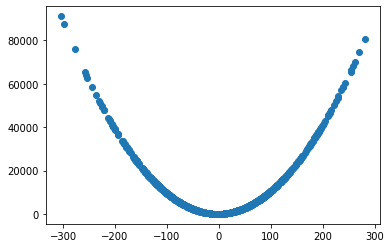

In [16]:
# plotting the generated data
x,y = zip(*X)
plt.scatter(x,y, label ='real_data')
plt.show()

In [23]:
# defining generator and discriminator models
z_dim = 256
hidden_dim =1024 

# generator generates a 2d point eventually      
generator = nn.Sequential(nn.Linear(z_dim,hidden_dim),
                          nn.ReLU(), nn.Linear(hidden_dim,2))

#discriminator generates the prob of it being real or not
#takes in 2D point, projects to hidden dim and then to single dim
discriminator = nn.Sequential(nn.Linear(2,hidden_dim),
                              nn.ReLU(),
                              nn.Linear(hidden_dim,1),
                              nn.Sigmoid())

In [24]:
g_model = generator.to(device)
d_model = discriminator.to(device)
print(g_model)
print(d_model)

Sequential(
  (0): Linear(in_features=256, out_features=1024, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1024, out_features=2, bias=True)
)
Sequential(
  (0): Linear(in_features=2, out_features=1024, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1024, out_features=1, bias=True)
  (3): Sigmoid()
)


In [25]:
def plot_points (real, generated, epoch):
    x, y = zip(*generated.tolist())
    plt.scatter(x, y, label='Generated Data',color='red')
    plt.show()
    x, y = zip(*real.tolist())
    plt.scatter(x, y, label='Real Data',color='blue')
    plt.xlabel("input")
    plt.title("Comparsion of Real vs Generated Data - Epoch %s" %epoch)
    n=str(epoch).zfill(4)
    plt.show()

Epoch-0/5000 : Disriminator Loss - 0.7004794478416443, Generator Loss - 0.692123532295227


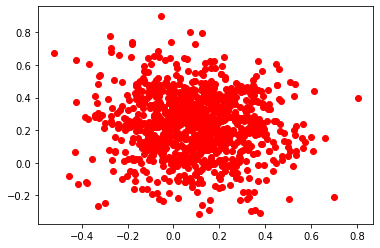

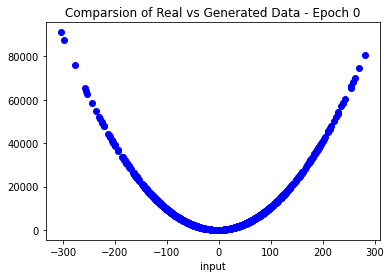

Epoch-100/5000 : Disriminator Loss - 0.7020525336265564, Generator Loss - 0.6931060552597046


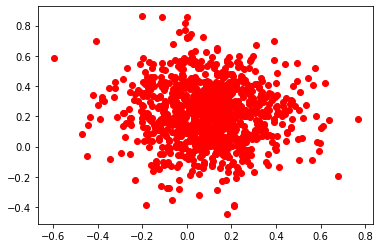

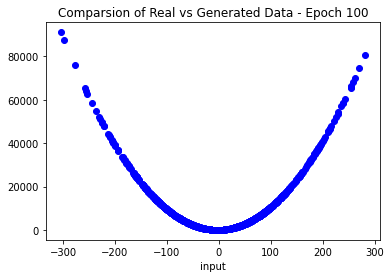

Epoch-200/5000 : Disriminator Loss - 0.7013334631919861, Generator Loss - 0.6919611096382141


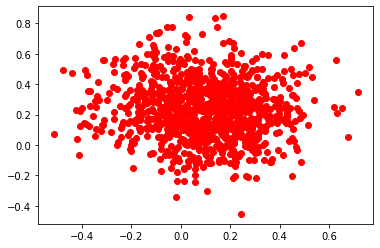

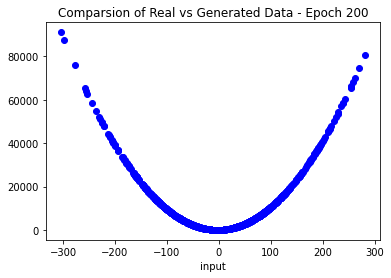

Epoch-300/5000 : Disriminator Loss - 0.7006284594535828, Generator Loss - 0.6920144557952881


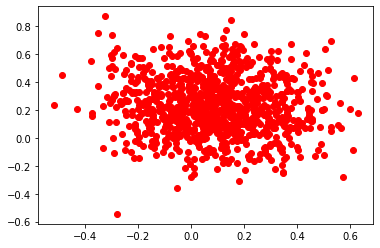

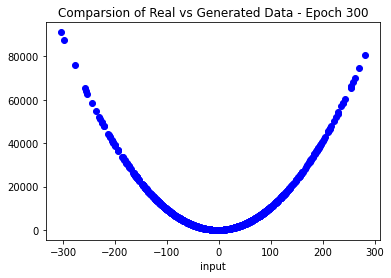

Epoch-400/5000 : Disriminator Loss - 0.7007369995117188, Generator Loss - 0.6919705867767334


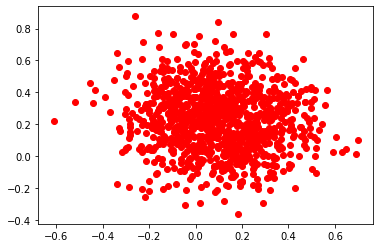

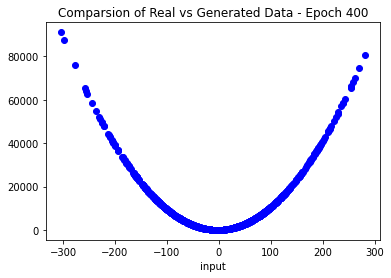

Epoch-500/5000 : Disriminator Loss - 0.7014808654785156, Generator Loss - 0.6912450790405273


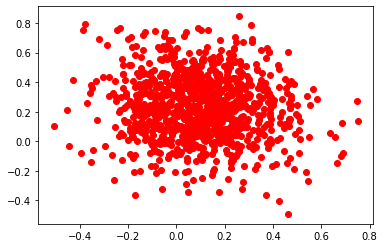

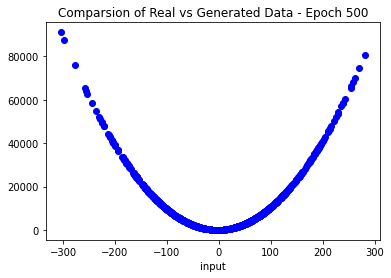

Epoch-600/5000 : Disriminator Loss - 0.7000313997268677, Generator Loss - 0.6920150518417358


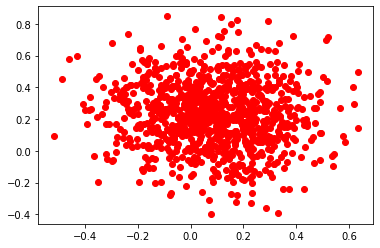

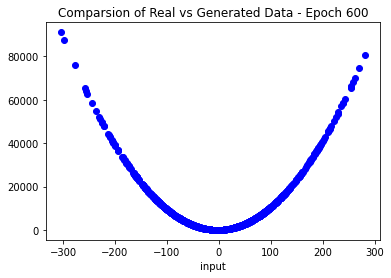

Epoch-700/5000 : Disriminator Loss - 0.7012979984283447, Generator Loss - 0.6919696927070618


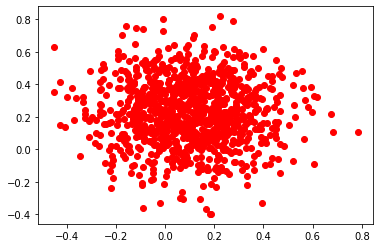

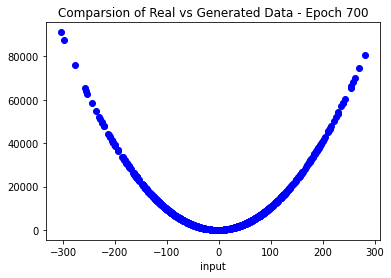

Epoch-800/5000 : Disriminator Loss - 0.701053261756897, Generator Loss - 0.6924939155578613


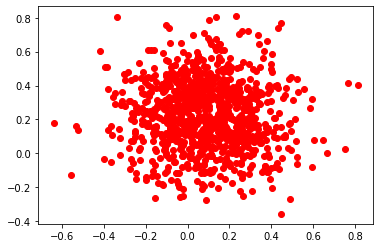

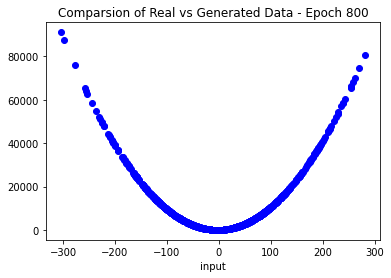

Epoch-900/5000 : Disriminator Loss - 0.7015256881713867, Generator Loss - 0.6927985548973083


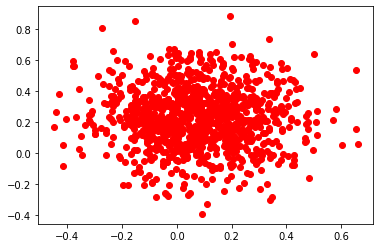

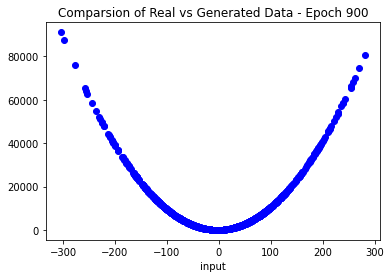

Epoch-1000/5000 : Disriminator Loss - 0.7002843618392944, Generator Loss - 0.6918500661849976


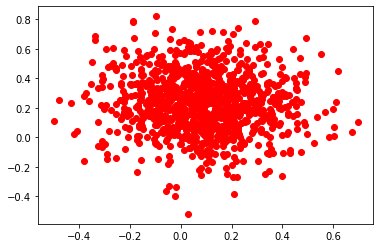

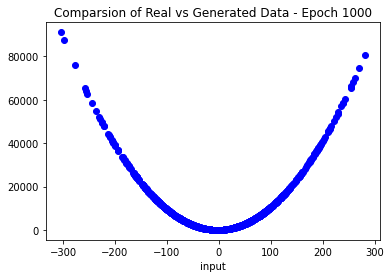

Epoch-1100/5000 : Disriminator Loss - 0.7008574604988098, Generator Loss - 0.6916844248771667


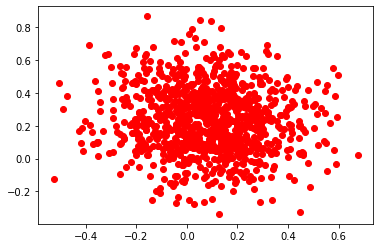

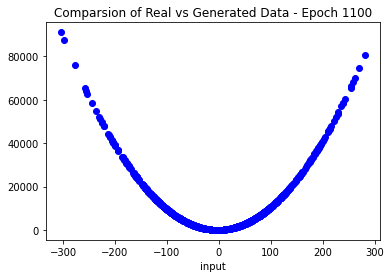

Epoch-1200/5000 : Disriminator Loss - 0.7014216780662537, Generator Loss - 0.6927626132965088


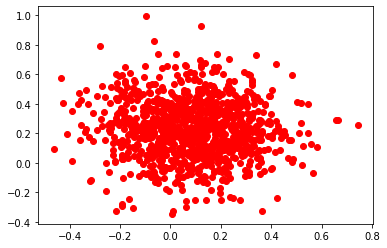

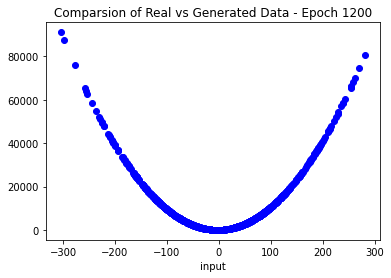

Epoch-1300/5000 : Disriminator Loss - 0.7004008889198303, Generator Loss - 0.6923084855079651


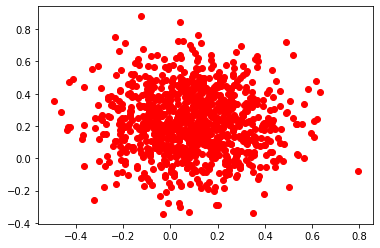

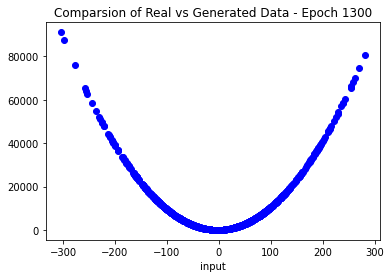

Epoch-1400/5000 : Disriminator Loss - 0.701324999332428, Generator Loss - 0.6911986470222473


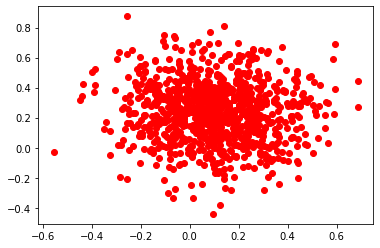

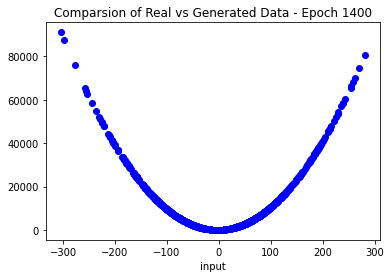

Epoch-1500/5000 : Disriminator Loss - 0.7017540335655212, Generator Loss - 0.6915717720985413


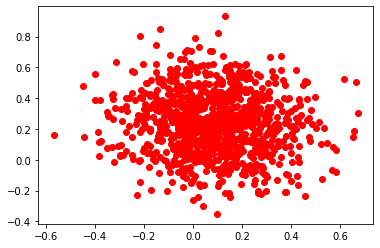

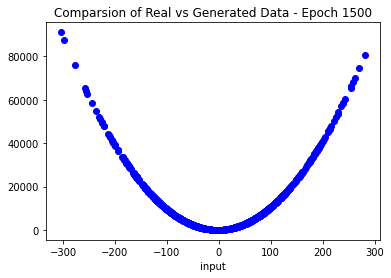

Epoch-1600/5000 : Disriminator Loss - 0.7006349563598633, Generator Loss - 0.691846489906311


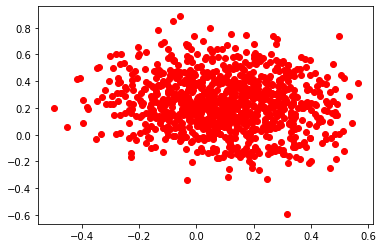

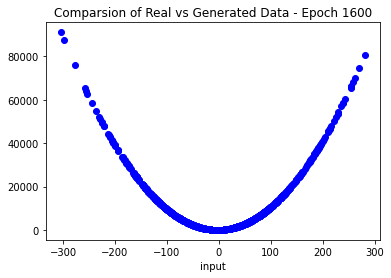

Epoch-1700/5000 : Disriminator Loss - 0.7007663249969482, Generator Loss - 0.6918125152587891


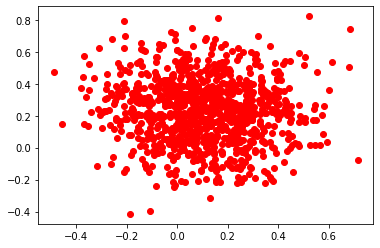

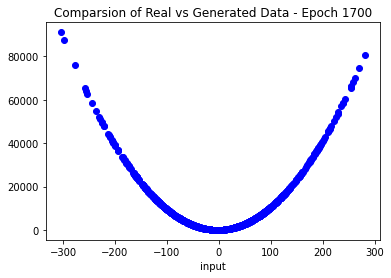

Epoch-1800/5000 : Disriminator Loss - 0.7006126046180725, Generator Loss - 0.6924336552619934


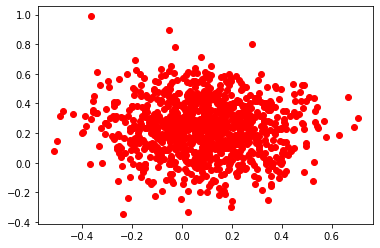

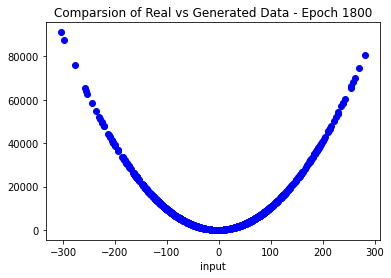

Epoch-1900/5000 : Disriminator Loss - 0.7012246251106262, Generator Loss - 0.6914191246032715


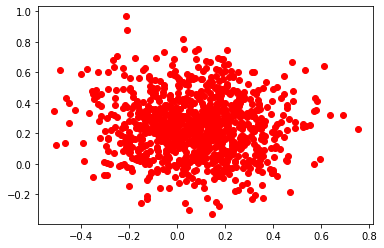

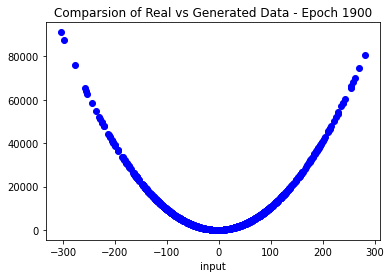

Epoch-2000/5000 : Disriminator Loss - 0.7003809213638306, Generator Loss - 0.6917017102241516


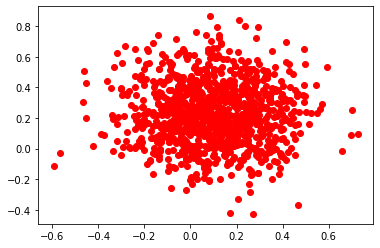

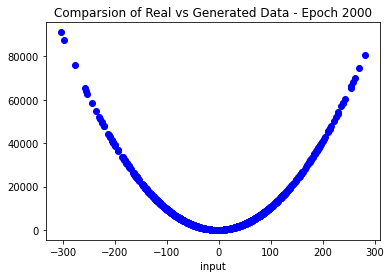

Epoch-2100/5000 : Disriminator Loss - 0.7014941573143005, Generator Loss - 0.6919883489608765


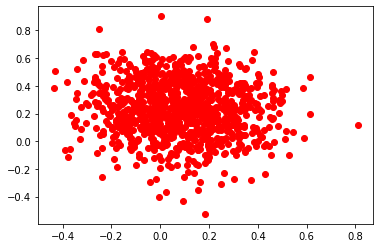

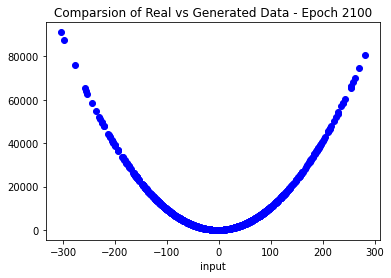

Epoch-2200/5000 : Disriminator Loss - 0.7012024521827698, Generator Loss - 0.6921920776367188


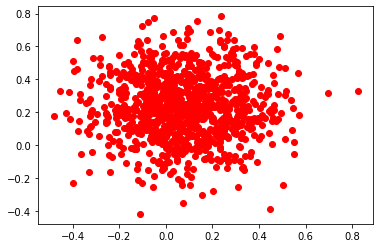

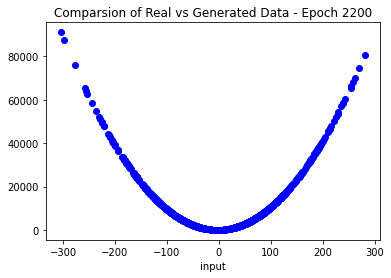

Epoch-2300/5000 : Disriminator Loss - 0.7003064155578613, Generator Loss - 0.6921806931495667


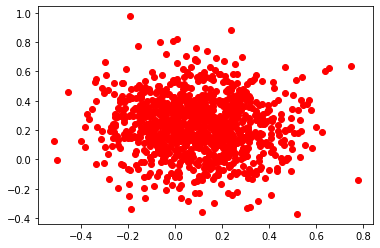

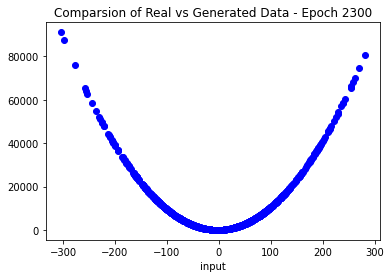

Epoch-2400/5000 : Disriminator Loss - 0.7002782225608826, Generator Loss - 0.6914354562759399


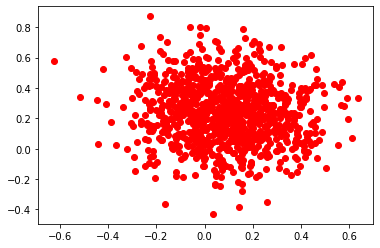

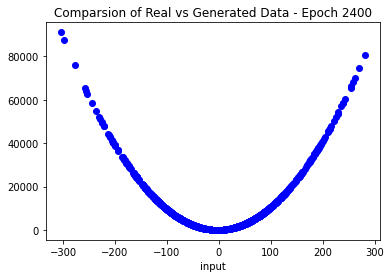

Epoch-2500/5000 : Disriminator Loss - 0.7011362910270691, Generator Loss - 0.6924551129341125


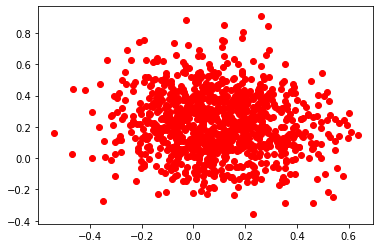

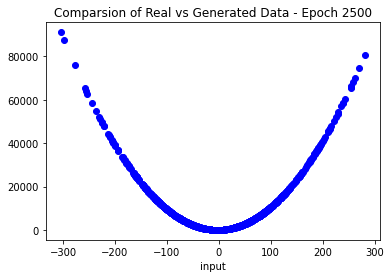

Epoch-2600/5000 : Disriminator Loss - 0.6999192237854004, Generator Loss - 0.6904956698417664


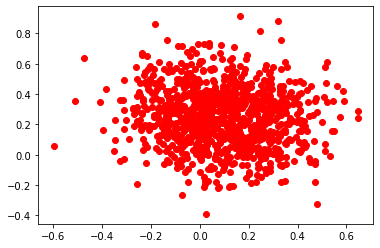

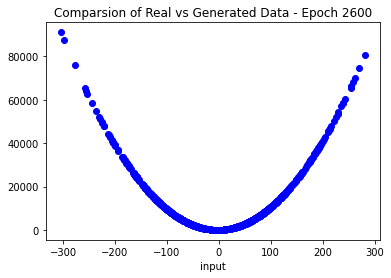

Epoch-2700/5000 : Disriminator Loss - 0.700732946395874, Generator Loss - 0.6923366785049438


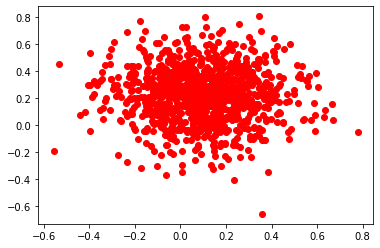

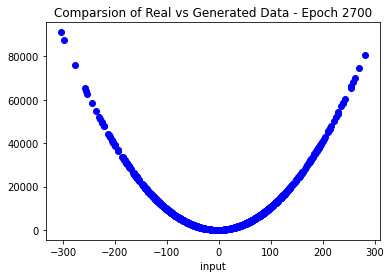

Epoch-2800/5000 : Disriminator Loss - 0.7008230686187744, Generator Loss - 0.691539466381073


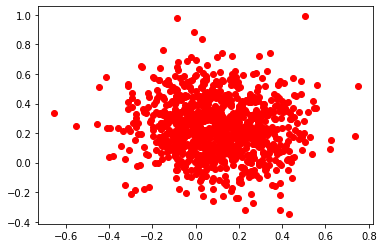

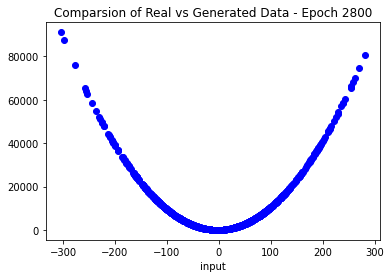

Epoch-2900/5000 : Disriminator Loss - 0.7013691067695618, Generator Loss - 0.69293612241745


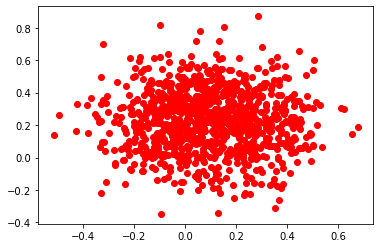

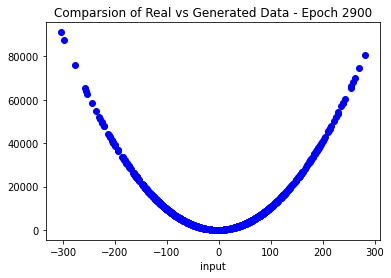

Epoch-3000/5000 : Disriminator Loss - 0.6998711228370667, Generator Loss - 0.6913465857505798


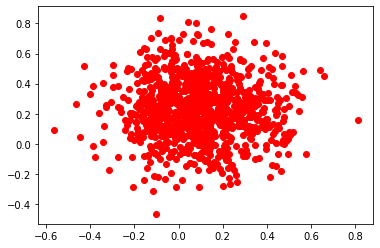

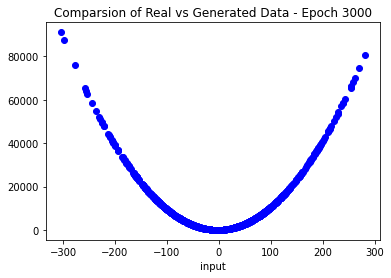

Epoch-3100/5000 : Disriminator Loss - 0.7011736035346985, Generator Loss - 0.6929239630699158


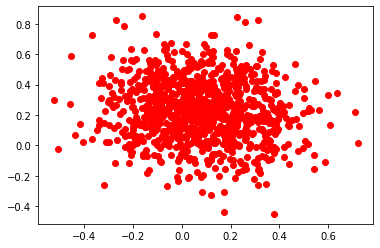

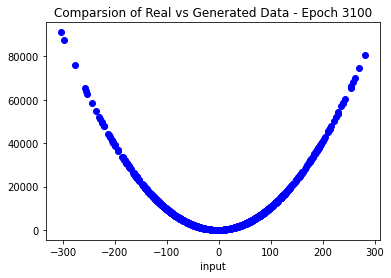

Epoch-3200/5000 : Disriminator Loss - 0.7007822394371033, Generator Loss - 0.6915212869644165


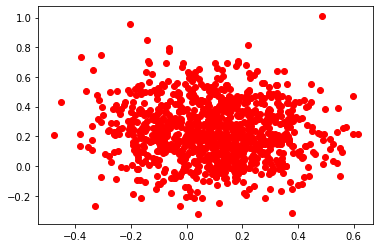

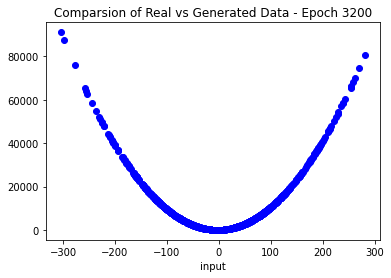

Epoch-3300/5000 : Disriminator Loss - 0.7009392380714417, Generator Loss - 0.6912956833839417


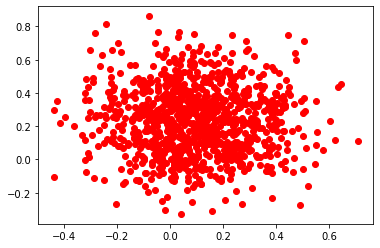

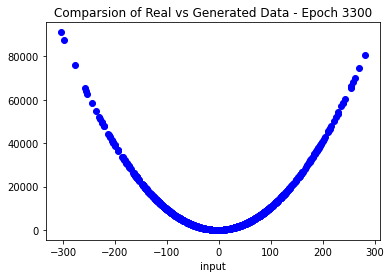

Epoch-3400/5000 : Disriminator Loss - 0.7003313899040222, Generator Loss - 0.6914892792701721


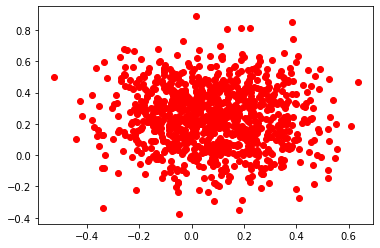

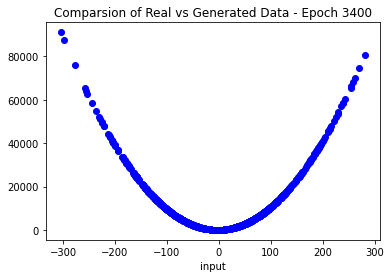

Epoch-3500/5000 : Disriminator Loss - 0.7001258134841919, Generator Loss - 0.691920816898346


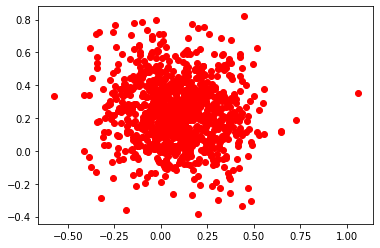

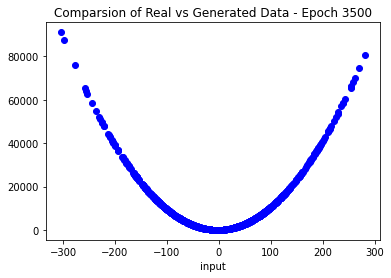

Epoch-3600/5000 : Disriminator Loss - 0.701228678226471, Generator Loss - 0.6908000707626343


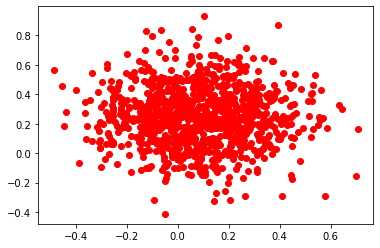

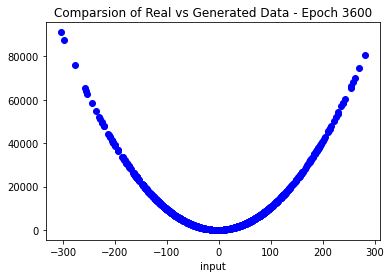

Epoch-3700/5000 : Disriminator Loss - 0.7000465393066406, Generator Loss - 0.6915662884712219


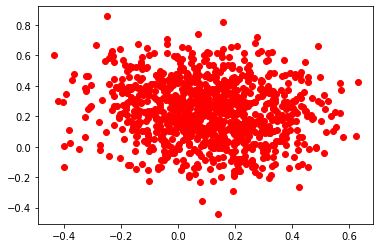

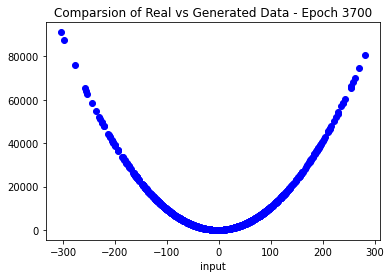

Epoch-3800/5000 : Disriminator Loss - 0.7014600038528442, Generator Loss - 0.6919878125190735


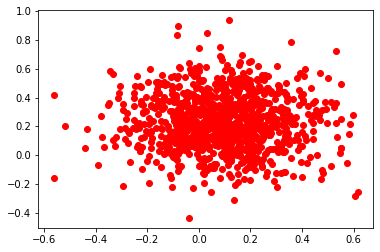

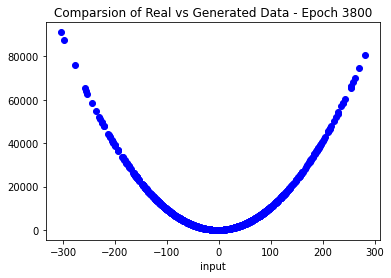

Epoch-3900/5000 : Disriminator Loss - 0.7004181742668152, Generator Loss - 0.6915165185928345


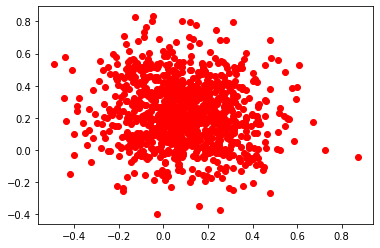

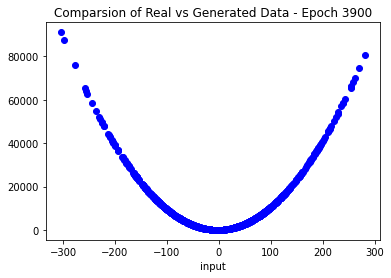

Epoch-4000/5000 : Disriminator Loss - 0.7004507780075073, Generator Loss - 0.6917051076889038


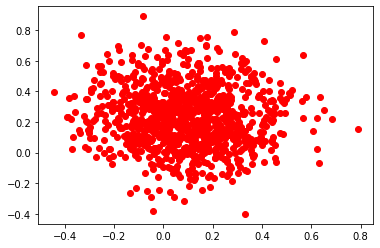

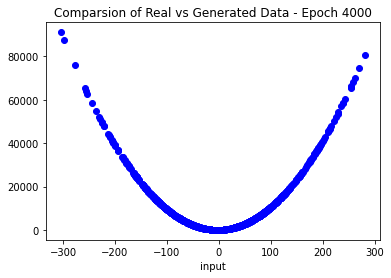

Epoch-4100/5000 : Disriminator Loss - 0.700028657913208, Generator Loss - 0.6903041005134583


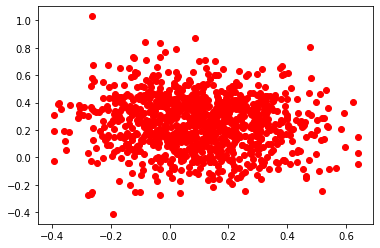

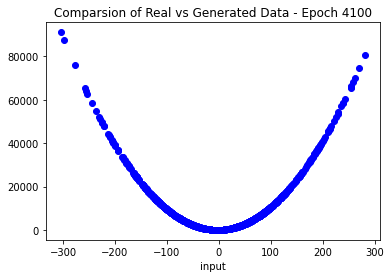

Epoch-4200/5000 : Disriminator Loss - 0.7002829909324646, Generator Loss - 0.6930738091468811


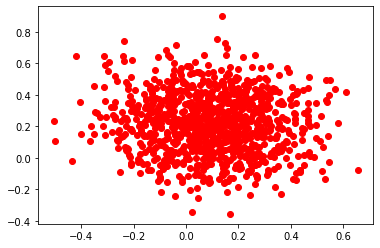

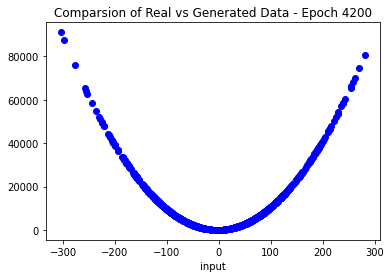

Epoch-4300/5000 : Disriminator Loss - 0.7009887099266052, Generator Loss - 0.6923264265060425


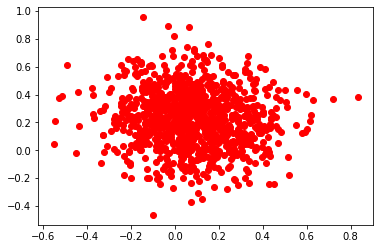

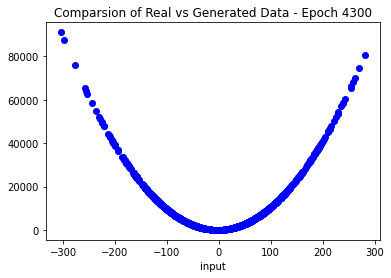

Epoch-4400/5000 : Disriminator Loss - 0.7012516260147095, Generator Loss - 0.6923858523368835


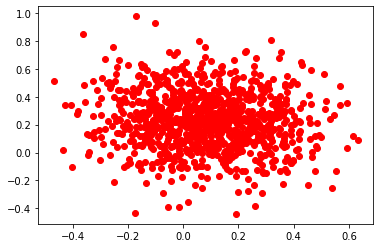

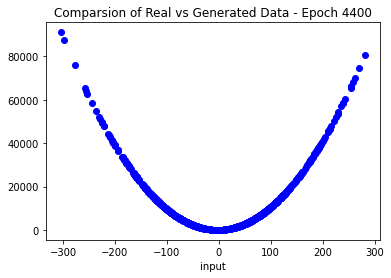

Epoch-4500/5000 : Disriminator Loss - 0.7010095119476318, Generator Loss - 0.6934332847595215


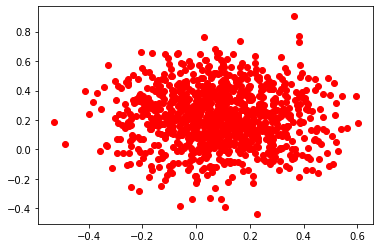

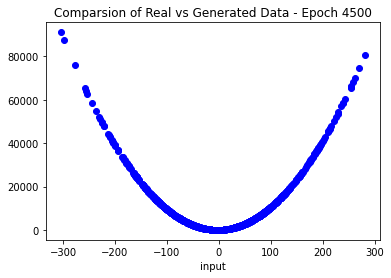

Epoch-4600/5000 : Disriminator Loss - 0.7011463642120361, Generator Loss - 0.6938948631286621


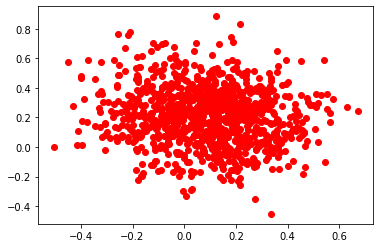

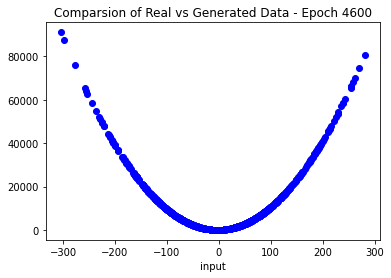

Epoch-4700/5000 : Disriminator Loss - 0.7017157077789307, Generator Loss - 0.6913856267929077


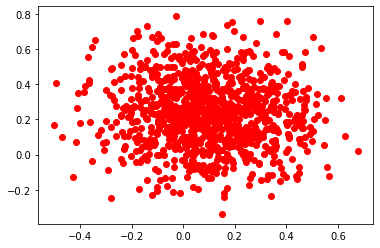

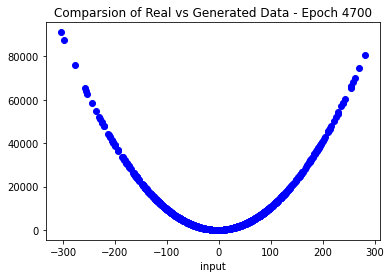

Epoch-4800/5000 : Disriminator Loss - 0.7000421285629272, Generator Loss - 0.6924123764038086


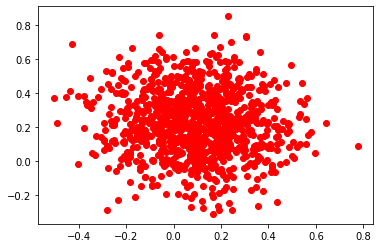

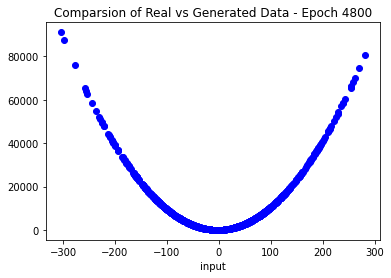

Epoch-4900/5000 : Disriminator Loss - 0.7004771828651428, Generator Loss - 0.6911031603813171


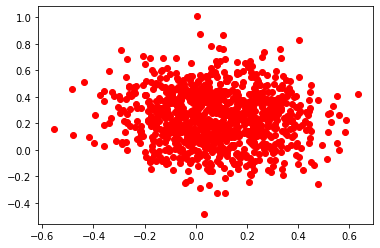

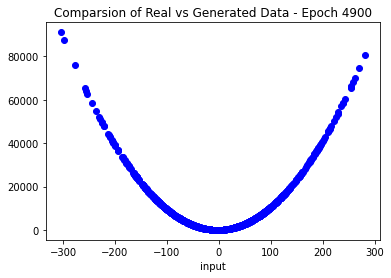

In [30]:
# training the model
batch_size = 1000
lr= 1e-20
num_epochs = 5000
display_epoch=100
g_optimizer = optim.Adam(g_model.parameters(),lr=lr)
d_optimizer = optim.Adam(d_model.parameters(), lr=lr)
g_losses, d_losses = [],[]
for epoch in range(num_epochs):
    #shuffling the data
    np.random.shuffle(X)
    real_samples = torch.from_numpy(X).type(torch.FloatTensor)
    for real_batch in real_samples.split(batch_size):
        #improving Discriminator
        # create fake z - gaussian normal samples
        z = torch.empty(batch_size,z_dim).normal_().to(device)
        fake_batch = g_model(z).to(device)
        d_scores_on_real = d_model(real_batch.to(device))
        d_scores_on_fake = d_model(fake_batch)
        #writing the loss function as quoted above
        d_loss = - torch.mean(torch.log(1-d_scores_on_fake) + torch.log(d_scores_on_real))
        d_losses.append(d_loss.item())
        d_optimizer.zero_grad()
        d_loss.backward()
        d_optimizer.step()

        #improving generator
        z = torch.empty(batch_size,z_dim).normal_().to(device)
        fake_batch = g_model(z).to(device)
        d_scores_on_fake = d_model(fake_batch)
        g_loss = -torch.mean(torch.log(d_scores_on_fake))
        g_losses.append(g_loss.item())
        g_optimizer.zero_grad()
        g_loss.backward()
        g_optimizer.step()
        
    if epoch% display_epoch==0:
      print("Epoch-{}/{} : Disriminator Loss - {}, Generator Loss - {}".format(epoch,num_epochs,d_loss,g_loss))
      plot_points(real_batch,fake_batch,epoch)


In [31]:
def plot_losses(dis, gen):
    plt.plot(dis, label='Discriminator Loss')
    plt.plot(gen, label='Generator Loss')
    plt.legend(loc='upper right')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Discriminator and Generator Loss")
    plt.show()

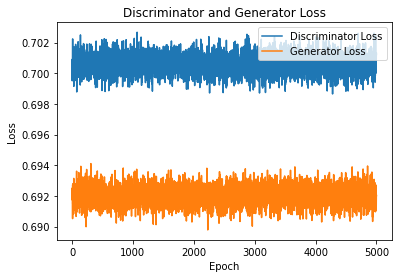

In [32]:
plot_losses(d_losses,g_losses)